In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy as sc
import scipy.optimize as sco
import scipy.constants as c
from scipy.optimize import curve_fit as cf
import pandas as pd

[0, 2230, 7644]
15273.64 4459.52


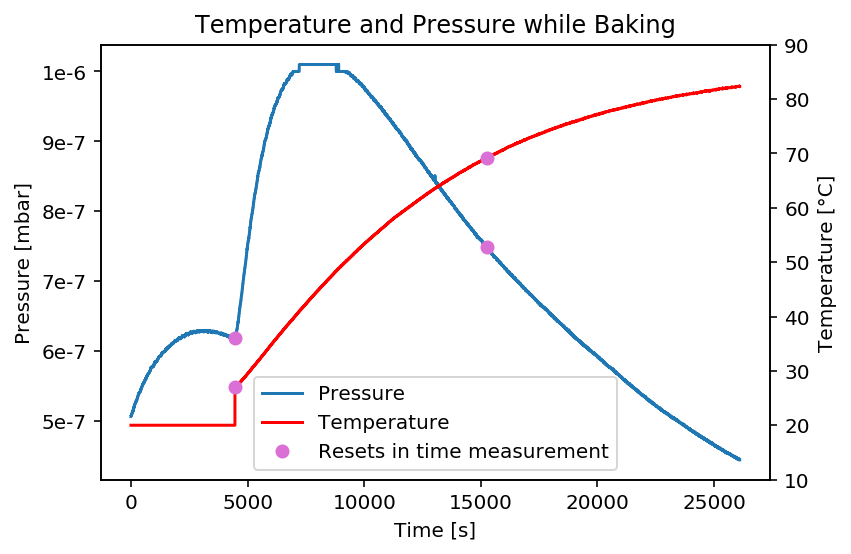

In [11]:
data=[]
data.append( pd.read_csv("20180307_JonasLehnenGuntherTuerk/Baking 1",delimiter="\t" ))

for entry in data:
    time= entry.values[:,0]
    p= entry.values[:,1]
    temp= entry.values[:,2]

"Fixing this damn fucked up timeline... omfg..."
breaks=[0,0,0]
count=0
for i in range(len(time)):
    if time[i]<time[i-1]:
        breaks[count]=i
        count=count+1
print(breaks)
timeStamp=(time[breaks[1]-1] + time[breaks[2]-1])
print(timeStamp, time[breaks[1]-1])
newTime=np.append( time[:breaks[1]] , (time[breaks[1]:breaks[2]] + time[breaks[1]-1] ) )
newTime=np.append(newTime,(time[breaks[2]:] + timeStamp)  )

fig,ax=plt.subplots(dpi=144)
lns1=ax.plot(newTime,p,label="Pressure")
lns2=ax.plot([newTime[breaks[1]],newTime[breaks[2]]],[p[breaks[1]],p[breaks[2]]],"o",color="orchid",
          label="Resets in time measurement")
ax.set(xlabel="Time [s]",ylabel="Pressure [mbar]", title="Temperature and Pressure while Baking" )

ax2 = ax.twinx()
lns3=ax2.plot(newTime,temp,color="red",label="Temperature")
ax2.plot([newTime[breaks[1]],newTime[breaks[2]]],[temp[breaks[1]],temp[breaks[2]]],"o",color="orchid")
ax2.set(ylim=[10,90],ylabel="Temperature [°C]")

lns = lns1+lns3+lns2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs)
ax.set(yticks=[5e-7,6e-7,7e-7,8e-7,9e-7,1e-6], yticklabels=["5e-7","6e-7","7e-7","8e-7","9e-7","1e-6"])
fig.savefig("Plots/Baking.png")